# Training

In [1]:
%%capture
%pip install -r requirements.txt

In [2]:
import numpy as np
import tensorflow as tf;
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from entanglement_witnesses import witnesses
import mlflow

2024-05-22 17:55:22.034291: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-22 17:55:22.440166: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-22 17:55:23.210757: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
# Parameters cells
WITNESS_NAME = "CHSH"

In [3]:
mlflow.set_tracking_uri(
    "http://localhost:5000"
)

In [4]:
def get_model(name, data_file_path):

    data = np.load(data_file_path)
    simulated_states = data["states"]
    simulated_labels = data["labels"]

    model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(simulated_states.shape[1],)),  # Adjust input shape based on your data
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    X_train, X_val, y_train, y_val = train_test_split(simulated_states, simulated_labels, test_size=0.2, random_state=42)
    history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

    # Start an MLflow run and log the model
    with mlflow.start_run() as run:
        # Log the model
        mlflow.tensorflow.log_model(model, "model")

        # Log parameters
        mlflow.log_param("witness", name)

        # Evaluate the model and log metrics
        loss, accuracy = model.evaluate(X_val, y_val)
        mlflow.log_metric("loss", loss)
        mlflow.log_metric("accuracy", accuracy)
        
        # Register the model
        model_name = "QuantumStateClassifier-" + name
        model_uri = f"runs:/{run.info.run_id}/model"
        mlflow.register_model(model_uri, model_name)
        print(f"Model saved in run {run.info.run_id}")

    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model {} Accuracy'.format(name))
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()
    
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model {} Loss'.format(name))
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

    return model

2024/05/22 17:55:24 INFO mlflow.tracking.fluent: Experiment with name 'ML Quantum entanglement' does not exist. Creating a new experiment.
/home/faical/anaconda3/envs/quantum-entanglement/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-22 17:55:24.818002: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-22 17:55:25.005659: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1),

Epoch 1/20


2024-05-22 17:55:25.006875: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-22 17:55:25.006992: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-22 17:55:25.007065: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

144/150 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step - accuracy: 0.6637 - loss: 0.6112

I0000 00:00:1716393326.509455  104504 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6662 - loss: 0.6079 - val_accuracy: 0.8700 - val_loss: 0.3785
Epoch 2/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - accuracy: 0.9006 - loss: 0.2908 - val_accuracy: 0.9408 - val_loss: 0.1594
Epoch 3/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - accuracy: 0.9553 - loss: 0.1372 - val_accuracy: 0.9642 - val_loss: 0.1067
Epoch 4/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - accuracy: 0.9726 - loss: 0.0946 - val_accuracy: 0.9675 - val_loss: 0.0918
Epoch 5/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - accuracy: 0.9783 - loss: 0.0942 - val_accuracy: 0.9767 - val_loss: 0.0803
Epoch 6/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - accuracy: 0.9841 - loss: 0.0725 - val_accuracy: 0.9775 - val_loss: 0.0735
Epoch 7/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - accuracy: 0.9839 - loss: 0.0852 - val_accuracy: 0.9742 - val_loss: 0.0753
Epoch 8/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - accuracy: 0.9894 - loss: 0.0459 - val_accuracy:

2024/05/22 17:55:29 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - accuracy: 0.9890 - loss: 0.0743


/home/faical/anaconda3/envs/quantum-entanglement/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Successfully registered model 'QuantumStateClassifier-CONCURRENCE'.
2024/05/22 17:55:32 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: QuantumStateClassifier-CONCURRENCE, version 1


Model saved in run b342f478643941f5bb05a69b6369e49d


Created version '1' of model 'QuantumStateClassifier-CONCURRENCE'.


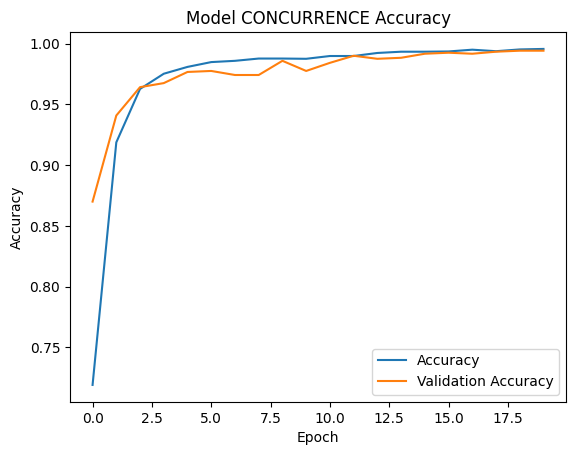

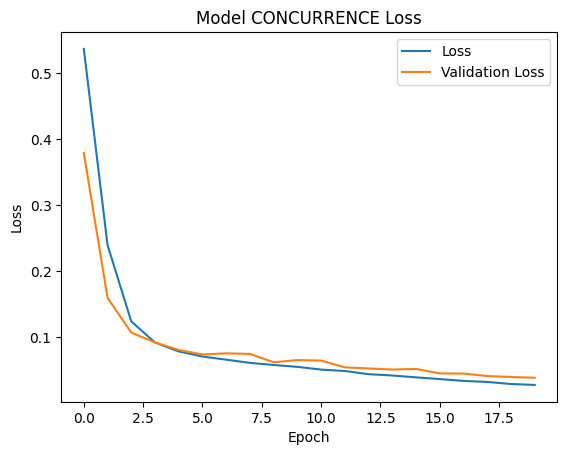

Epoch 1/20


/home/faical/anaconda3/envs/quantum-entanglement/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6571 - loss: 0.6182 - val_accuracy: 0.8292 - val_loss: 0.3848
Epoch 2/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - accuracy: 0.9016 - loss: 0.2854 - val_accuracy: 0.9517 - val_loss: 0.1418
Epoch 3/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - accuracy: 0.9644 - loss: 0.1115 - val_accuracy: 0.9717 - val_loss: 0.0858
Epoch 4/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - accuracy: 0.9795 - loss: 0.0709 - val_accuracy: 0.9750 - val_loss: 0.0652
Epoch 5/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step - accuracy: 0.9870 - loss: 0.0437 - val_accuracy: 0.9792 - val_loss: 0.0538
Epoch 6/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - accuracy: 0.9918 - loss: 0.0335 - val_accuracy: 0.9917 - val_loss: 0.0430
Epoch 7/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - accuracy: 0.9944 - loss: 0.0279 - val_accuracy: 0.9858 - val_loss: 0.0369
Epoch 8/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step - accuracy: 0.9952 - loss: 0.0196 - val_accuracy:

2024/05/22 17:55:35 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - accuracy: 0.9910 - loss: 0.0398


Successfully registered model 'QuantumStateClassifier-ENTROPY'.
2024/05/22 17:55:37 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: QuantumStateClassifier-ENTROPY, version 1


Model saved in run 2428bf399251434897402caf34a9a6ab


Created version '1' of model 'QuantumStateClassifier-ENTROPY'.


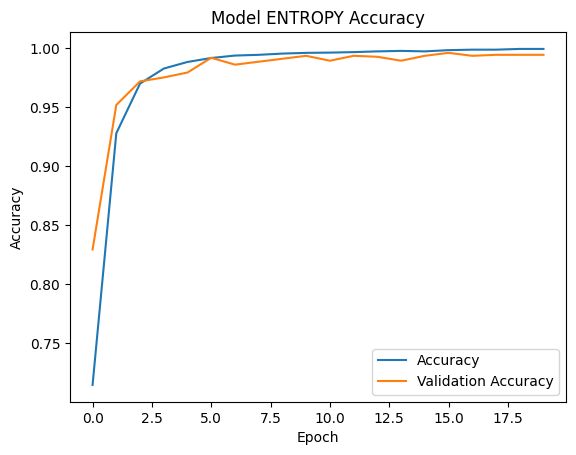

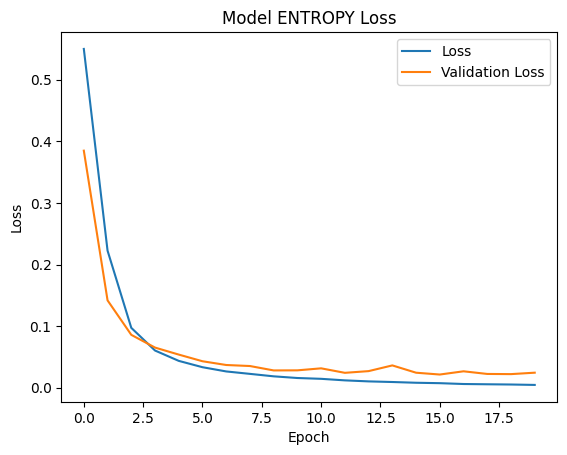

Epoch 1/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6578 - loss: 0.6069 - val_accuracy: 0.8675 - val_loss: 0.3651
Epoch 2/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step - accuracy: 0.9088 - loss: 0.2814 - val_accuracy: 0.9550 - val_loss: 0.1358
Epoch 3/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - accuracy: 0.9642 - loss: 0.1120 - val_accuracy: 0.9725 - val_loss: 0.0807
Epoch 4/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - accuracy: 0.9834 - loss: 0.0649 - val_accuracy: 0.9783 - val_loss: 0.0626
Epoch 5/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - accuracy: 0.9883 - loss: 0.0431 - val_accuracy: 0.9875 - val_loss: 0.0540
Epoch 6/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - accuracy: 0.9880 - loss: 0.0409 - val_accuracy: 0.9825 - val_loss: 0.0447
Epoch 7/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - accuracy: 0.9917 - loss: 0.0260 - val_accuracy: 0.9850 - val_loss: 0.0397
Epoch 8/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - accuracy: 0.9942 - loss: 0.0225 - va

2024/05/22 17:55:41 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - accuracy: 0.9915 - loss: 0.0375


Successfully registered model 'QuantumStateClassifier-NEGATIVITY'.
2024/05/22 17:55:43 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: QuantumStateClassifier-NEGATIVITY, version 1


Model saved in run ae259290b03f4b0eaf7ab6e09f36bc53


Created version '1' of model 'QuantumStateClassifier-NEGATIVITY'.


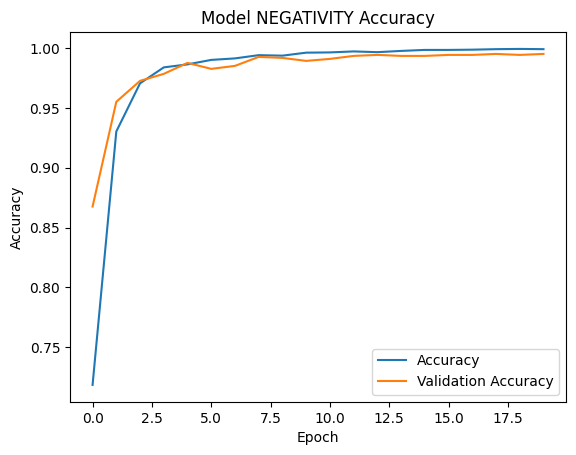

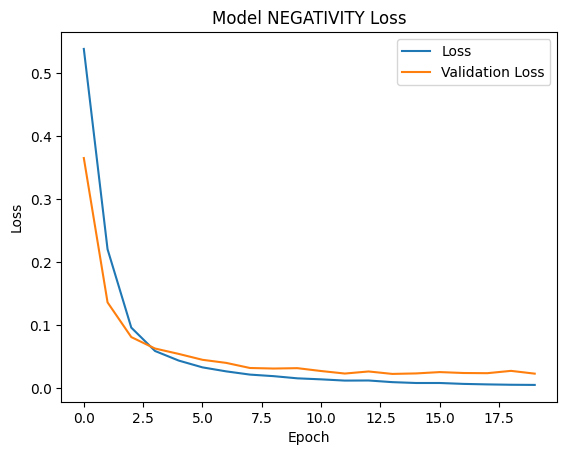

Epoch 1/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7162 - loss: 0.5811 - val_accuracy: 0.7725 - val_loss: 0.4629
Epoch 2/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step - accuracy: 0.7900 - loss: 0.4297 - val_accuracy: 0.8567 - val_loss: 0.3654
Epoch 3/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - accuracy: 0.8722 - loss: 0.3195 - val_accuracy: 0.8892 - val_loss: 0.2603
Epoch 4/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - accuracy: 0.9082 - loss: 0.2372 - val_accuracy: 0.9333 - val_loss: 0.2083
Epoch 5/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step - accuracy: 0.9376 - loss: 0.1830 - val_accuracy: 0.9708 - val_loss: 0.1421
Epoch 6/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - accuracy: 0.9668 - loss: 0.1329 - val_accuracy: 0.9733 - val_loss: 0.1123
Epoch 7/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - accuracy: 0.9691 - loss: 0.1095 - val_accuracy: 0.9817 - val_loss: 0.0948
Epoch 8/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - accuracy: 0.9721 - loss: 0.0953 - va

2024/05/22 17:55:46 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - accuracy: 0.9790 - loss: 0.0528


Successfully registered model 'QuantumStateClassifier-CHSH'.
2024/05/22 17:55:48 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: QuantumStateClassifier-CHSH, version 1


Model saved in run c24773769276483582f86fa6e7832e09


Created version '1' of model 'QuantumStateClassifier-CHSH'.


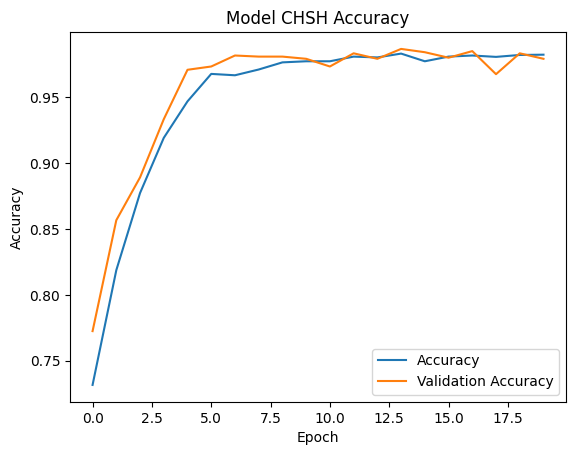

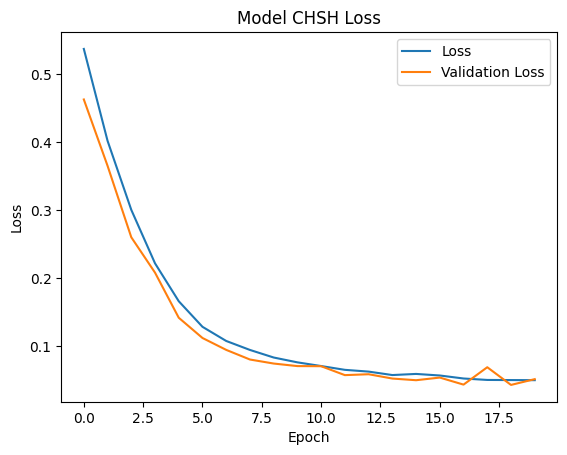

In [5]:
models = {}
parameter_witness = {WITNESS_NAME: witnesses[WITNESS_NAME]}

mlflow.set_experiment('ML Quantum entanglement')

for name, witness in witnesses.items():
    data_file_path = "./simulated_data/simulation-{}.npz".format(name)
    model = get_model(name, data_file_path)
    models[name] = {"model": model, "witness": witness}
